Web Attack importance list:
Web Attack 
                              importance
Features                               
Flow Duration                       0.0
Total Fwd Packets                   0.0
Total Backward Packets              0.0
Total Length of Fwd Packets         0.0
Total Length of Bwd Packets         0.0
Fwd Packet Length Max               0.0
Fwd Packet Length Min               0.0
Fwd Packet Length Mean              0.0
Fwd Packet Length Std               0.0
Bwd Packet Length Max               0.0
Bwd Packet Length Min               0.0
Bwd Packet Length Mean              0.0
Bwd Packet Length Std               0.0
Flow Bytes/s                        0.0
Flow Packets/s                      0.0
Flow IAT Mean                       0.0
Flow IAT Std                        0.0
Flow IAT Max                        0.0
Flow IAT Min                        0.0
Fwd IAT Total                       0.0 



Web Attack=["Flow Duration","Total Fwd Packets","Total Backward Packets","T

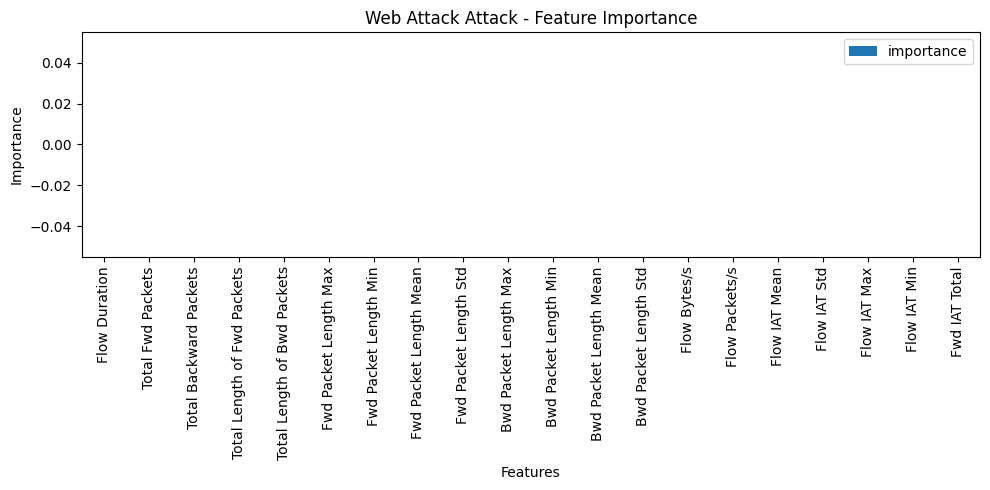

-----------------------------------------------------------------------------------------------




SSH-Patator importance list:
SSH-Patator 
                              importance
Features                               
Bwd Packet Length Min          0.000810
Flow IAT Mean                  0.000580
Flow Bytes/s                   0.000555
Total Length of Fwd Packets    0.000395
Flow IAT Max                   0.000330
Fwd Packet Length Max          0.000305
Fwd IAT Total                  0.000269
Fwd Packet Length Mean         0.000264
Flow Duration                  0.000255
Flow Packets/s                 0.000203
Total Backward Packets         0.000145
Fwd Packet Length Std          0.000113
Flow IAT Std                   0.000093
Total Length of Bwd Packets    0.000078
Flow IAT Min                   0.000076
Bwd Packet Length Mean         0.000074
Bwd Packet Length Max          0.000045
Total Fwd Packets              0.000043
Bwd Packet Length Std          0.000030
Fwd Packet Length

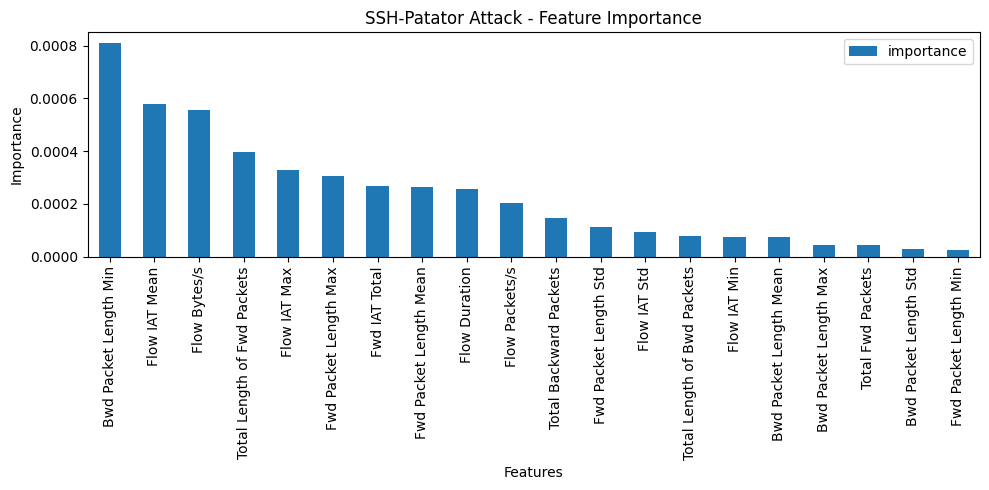

-----------------------------------------------------------------------------------------------




DoS Slowhttptest importance list:
DoS Slowhttptest 
                              importance
Features                               
Flow IAT Mean                  0.650752
Fwd Packet Length Min          0.112784
Bwd Packet Length Std          0.043554
Bwd Packet Length Mean         0.016904
Bwd Packet Length Max          0.014065
Total Length of Bwd Packets    0.013391
Flow IAT Min                   0.002839
Total Length of Fwd Packets    0.000811
Total Fwd Packets              0.000718
Fwd Packet Length Max          0.000635
Fwd Packet Length Mean         0.000525
Fwd Packet Length Std          0.000402
Bwd Packet Length Min          0.000371
Flow Bytes/s                   0.000278
Flow Duration                  0.000277
Flow IAT Max                   0.000221
Fwd IAT Total                  0.000189
Total Backward Packets         0.000149
Flow IAT Std                   0.000137
Flow Pa

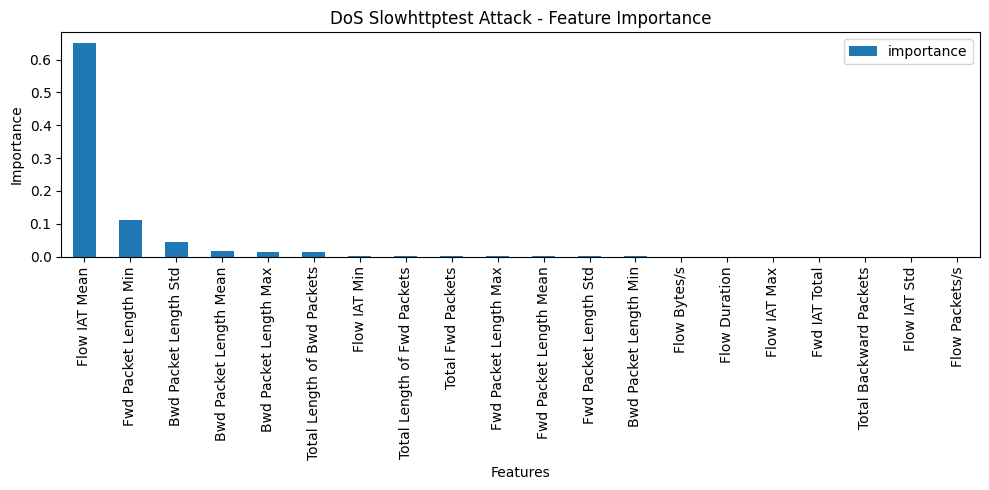

-----------------------------------------------------------------------------------------------




Infiltration importance list:
Infiltration 
                              importance
Features                               
Flow Duration                  0.251684
Fwd Packet Length Mean         0.072462
Flow IAT Max                   0.071162
Fwd IAT Total                  0.044272
Bwd Packet Length Mean         0.030879
Total Length of Fwd Packets    0.020950
Fwd Packet Length Std          0.020765
Fwd Packet Length Max          0.019628
Bwd Packet Length Std          0.014482
Flow Bytes/s                   0.009985
Total Fwd Packets              0.006241
Total Backward Packets         0.005407
Flow IAT Mean                  0.005125
Bwd Packet Length Max          0.002718
Flow IAT Min                   0.002305
Flow Packets/s                 0.001945
Flow IAT Std                   0.001326
Bwd Packet Length Min          0.000794
Fwd Packet Length Min          0.000706
Total Length of

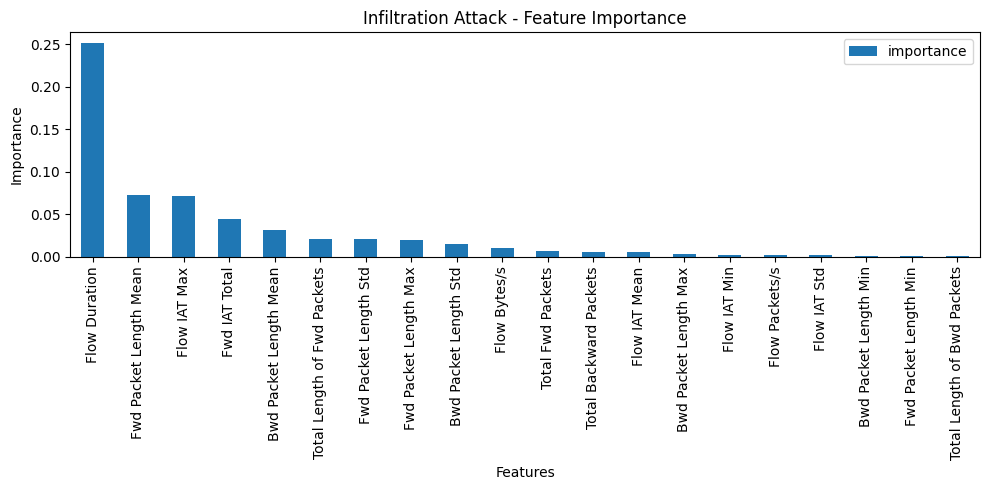

-----------------------------------------------------------------------------------------------






KeyboardInterrupt: 

In [2]:
##  "attacks" folder (with attack csv files) is required for the operation of the program.
##  "attacks" folder must be located in the same directory as the program.


##  the purpose of this code is to determine which features to use in the machine learning phase.
##  for this purpose, the importance weights of the attacks are calculated.
##  this calculation was made using sklearn-RandomForestRegressor.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files=os.listdir("attacks")# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_for_attack_files.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv(".\\attacks\\"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()

